## Task

I wanna draw a smaller bounding box.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms

import cv2

In [2]:
SEED = 1
np.random.seed(SEED)
torch.manual_seed(SEED)

## Data (from MNIST digits)

In [3]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)

In [4]:
num_workers = 0
batch_size = 16

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = num_workers, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = num_workers, shuffle = False)

In [5]:
print(train_loader.dataset.data.shape)

torch.Size([60000, 28, 28])


## Model specification

In [6]:
# class Model(nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, 5)
#         self.conv2 = nn.Conv2d(32, 32, 3)
#         self.conv3 = nn.Conv2d(32, 800, 5)
#         self.conv4 = nn.Conv2d(800, 800, 1)
#         self.conv5 = nn.Conv2d(800, 10, 1)
#         self.pool = nn.MaxPool2d((2,2))
#     def forward(self, x):
        
#         # (1, 28, 28) to (32, 24, 24)
#         x = F.relu(self.conv1(x))
#         # 24 = ((I - K + 2P)/S + 1) = ((28 - 5 + 2*0)/1 + 1), I = input size, K = kernel size, P = zero padding size, S = stride
        
#         # (32, 24, 24) to (32, 12, 12)
#         x = self.pool(x)
        
#         # (32, 12, 12) to (32, 10, 10)
#         x = F.relu(self.conv2(x))
#         # ((12 - 3 + 2 * 0)/1 + 1) = 10
        
#         # (32, 10, 10) to (32, 5, 5)
#         x = self.pool(x)
        
#         # (32, 5, 5) to (800, 1, 1)
#         x = F.relu(self.conv3(x))
#         # ((5 - 5 + 2 * 0)/1 + 1) = 1
        
#         # (800, 1, 1) to (800, 1, 1)
#         x = F.relu(self.conv4(x))
#         # ((1 - 1 + 2 * 0)/1 + 1) = 1 
        
#         # (800, 1, 1) to (10, 1, 1)
#         x = self.conv5(x)
#         # ((1 - 1 + 2 * 0)/1 + 1) = 1
        
#         return x

In [7]:
# class Model(nn.Module):
    
#     def __init__(self):
#         super(Model, self).__init__()
#         self.relu = nn.ReLU(inplace = True)
#         self.conv1 = nn.Conv2d(1, 32, 3) # in_channels, out_channels, kernel_size
#         self.conv2 = nn.Conv2d(32, 64, 2)
#         self.conv3 = nn.Conv2d(64, 64, 3)
#         self.maxpool = nn.MaxPool2d((2, 2))
#         self.drop = nn.Dropout(p = 0.5)
#         self.fc1 = nn.Linear(1024, 64)
#         self.fc2 = nn.Linear(64, 128)
#         self.fc3 = nn.Linear(128, 10)
        
#     def forward(self, x):
#         x = self.relu(self.conv1(x))
#         x = self.maxpool(x)
#         x = self.relu(self.conv2(x))
#         x = self.maxpool(x)
#         x = self.relu(self.conv3(x))
#         # the below is flatten
#         x = x.view(x.size(0), -1)
#         x = self.relu(self.fc1(x))
#         x = self.drop(x)
#         x = self.relu(self.fc2(x))
#         x = self.drop(x)
#         x = self.fc3(x)
        
#         return x    

In [8]:
# class Model(nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()    
        
#         self.relu = nn.ReLU()
    
#         # input channels = 1, output channels = 32
#         self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
#         self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 1)
#         self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 10, kernel_size = 1)
#         self.maxpool = nn.MaxPool2d(kernel_size = 2)
# #         self.maxpool = nn.MaxPool2d((2,2))
        
#     def forward(self, x):
        
#         # size changes from (1, 28, 28) to (32, 26, 26) 
#         x = self.relu(self.conv1(x))
#         # ((28 - 3 + 2 * 0)/1 + 1) = 26
        
#         # size changes from (32, 26, 26) to (32, 13, 13)
#         x = self.maxpool(x)
        
#         # (32, 13, 13) to (32, 13, 13)
#         x = self.relu(self.conv2(x))
#         # ((13 - 1 + 2 * 0)/1 + 1) = 13
        
#         # size changes from (32, 13, 13) to (32, 13, 13)
#         x = self.conv3(x)
#         # ((13 - 1 + 2 * 0)/1 + 1) = 13
        
#         return x

In [25]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()    
        
        self.relu = nn.ReLU()
    
        # input channels = 1, output channels = 32
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 27)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 1)
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 10, kernel_size = 1)
#         self.maxpool = nn.MaxPool2d(kernel_size = 2)
        self.maxpool = nn.MaxPool2d((2,2))
        
    def forward(self, x):
        
        # size changes from (1, 28, 28) to (32, 2, 2) 
        x = self.relu(self.conv1(x))
        # ((28 - 27 + 2 * 0)/1 + 1) = 2
        
        # size changes from (32, 2, 2) to (32, 1, 1)
        x = self.maxpool(x)
        
        # (32, 1, 1) to (32, 1, 1)
        x = self.relu(self.conv2(x))
        # ((1 - 1 + 2 * 0)/1 + 1) = 1
        
        # size changes from (32, 1, 1) to (10, 1, 1)
        x = self.conv3(x)
        # ((1 - 1 + 2 * 0)/1 + 1) = 1
        
        return x

## Train model

In [26]:
model = Model()

In [27]:
def train_model(model, train_loader, test_loader, n_epochs):
    """helper function to train the model
        inputs: model --> our model
                train_loader --> the train images loader
                test_loader --> the test images loader
                n_epchs --> number of iterations                
    """
    # specify loss function (categorical cross-entropy)
    criterion = nn.CrossEntropyLoss()
    # specify optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    min_test_accuracy = 0
    for epoch in range(1, n_epochs+1):

        # keep track of training and validation loss
        train_loss = 0.0
        train_accuracy = 0
        test_accuracy = 0
        ###################
        # train the model #
        ###################
        model.train()
        for images, labels in train_loader:
            
            # move tensors to GPU if CUDA is available
#             if use_cuda:
#                 images = images.cuda()
#                 labels = labels.cuda()

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
        
            # forward pass: compute predicted outputs by passing inputs to the model
            logits = model(images).squeeze()
            _, outs_k = logits.topk(1, dim=1)
            equals = (outs_k == labels.view(*outs_k.shape))
            train_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            
            # calculate the batch loss
            loss = criterion(logits, labels)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()


        train_loss = train_loss/len(train_loader)
        train_accuracy /= len(train_loader)
        ######################
        # validate the model #
        ######################
        model.eval()
        for images, labels in test_loader:
#             if use_cuda:
#                 images = images.cuda()
#                 labels = labels.cuda()
            logits = model(images).squeeze()
            _, outs_k = logits.topk(1, dim=1)
            equals = (outs_k == labels.view(*outs_k.shape))
            test_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        
        test_accuracy /= len(test_loader)
        print("""Epoch: {} \tTraining Loss: {:.6f} 
        \tTrain accuracy: {:.6f} \Test accuracy: {:.6f}""".format(
            epoch, train_loss,  train_accuracy, test_accuracy))
    
        # save model if validation accuracy has increased
        if test_accuracy >= min_test_accuracy:    
            torch.save(model.state_dict(), 'model.pt')
            min_test_accuracy = test_accuracy

In [28]:
# model = Model()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr = 3e-4)

# for epoch in range(1):
    
#     # training
#     for i, data in enumerate(train_loader, 0):
        
#         # get the inputs
#         inputs, labels = data
        
#         # zero parameter gradient
#         optimizer.zero_grad()
        
#         # Forward + backward + optimze
#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

# #     # validation
# #     model.eval()
# #     for i, data in enumerate(test_loader, 0):
        
# #         # get the inputs
# #         inputs, labels = datas

# print('Finished Training')

In [29]:
train_model(model, train_loader, test_loader, 2)

Epoch: 1 	Training Loss: 0.315954 
        	Train accuracy: 0.906867 \Test accuracy: 0.951400
Epoch: 2 	Training Loss: 0.146771 
        	Train accuracy: 0.956067 \Test accuracy: 0.961200


In [30]:
model.eval()

Model(
  (relu): ReLU()
  (conv1): Conv2d(1, 32, kernel_size=(27, 27), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(32, 10, kernel_size=(1, 1), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
)

## Check predictions

In [31]:
# # load first batch
# test_iterator = iter(test_loader)
# images, labels = test_iterator.next()
# # send it to gpu if available
# # if use_cuda:
# #     images = images.cuda()
# #     labels = labels.cuda()
# # get predictions
# predictions = F.softmax(model(images), dim=1).squeeze()
# probs , outs = predictions.topk(1, dim=1)

# # get random images from bacth
# random_idx = np.random.randint(batch_size)
# # if use_cuda:
# #     image1 = images[random_idx].cpu().detach().numpy().squeeze()
# #     image2 = images[(random_idx+1)%batch_size].cpu().detach().numpy().squeeze()
# # else : 
# #     image1 = images[random_idx].numpy().squeeze()
# #     image2 = images[(random_idx+1)%batch_size].numpy().squeeze()    
# image1 = images[random_idx].numpy().squeeze()
# image2 = images[(random_idx+1)%batch_size].numpy().squeeze()    

# prob1 = probs[random_idx, 0]. item()
# out1 = outs[random_idx, 0]. item()
# prob2 = probs[(random_idx+1)%batch_size, 0]. item()
# out2 = outs[(random_idx+1)%batch_size, 0]. item()

# # visualise results
# fig, axs = plt.subplots(1, 2)
# axs[0].imshow(image1)
# axs[0].set_title('{}({:.2f})'.format(out1,prob1))
# axs[1].imshow(image2)
# axs[1].set_title('{}({:.2f})'.format(out2,prob2))

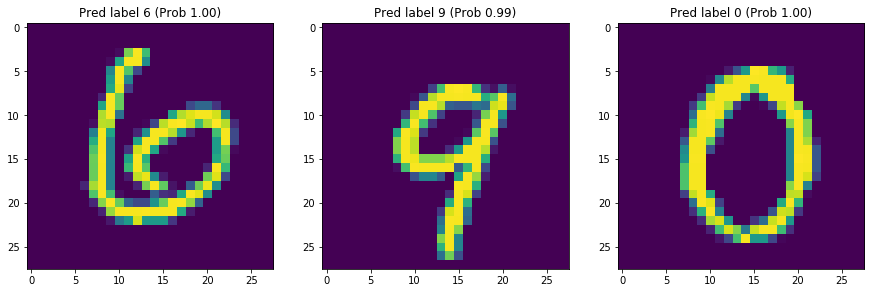

In [32]:
# obtain test data
test_iterator = iter(test_loader)
images, labels = test_iterator.next()

# check data
# print(F.softmax(model(images), dim = 1)[0])
# print(torch.round(F.softmax(model(images), dim = 1)[0]))

# predict probability of each labels
predictions = F.softmax(model(images), dim = 1).squeeze()
# torch.squeeze() removes dimension 1

# get the highest probability and its label since k = 1 (batch size 16)
probs, outs = predictions.topk(1, dim = 1)
# https://pytorch.org/docs/stable/torch.html#torch.topk

# randomly check the prediction results
index = np.random.randint(batch_size)
# since batch_size 16 is argument, random integers from 0 to 15

# to use plt imshow, make it numpy array
image1 = images[index].numpy().squeeze()
image2 = images[(index + 1) % batch_size].numpy().squeeze()
image3 = images[(index + 2) % batch_size].numpy().squeeze()

# prefiction confidence
# second argument 0 specification makes values, and torch.item() make it Python number
probs1 = probs[index, 0].item()
probs2 = probs[(index + 1) % batch_size].item()
probs3 = probs[(index + 2) % batch_size].item()

# predicted label
out1 = outs[index, 0].item()
out2 = outs[(index + 1) % batch_size].item()
out3 = outs[(index + 2) % batch_size].item()

# visualize
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 10))
axs[0].imshow(image1)
axs[0].set_title('Pred label {} (Prob {:.2f})'.format(out1, probs1))
axs[1].imshow(image2)
axs[1].set_title('Pred label {} (Prob {:.2f})'.format(out2, probs2))
axs[2].imshow(image3)
axs[2].set_title('Pred label {} (Prob {:.2f})'.format(out3, probs3))

plt.show()

## Digit location detection

To detect where the digits are, we make bigger size image, some part of which has digits.

In [33]:
# first_tensor = images[random_idx]
# second_tensor = images[(random_idx+1)%batch_size]
# third_tensor = images[(random_idx+2)%batch_size]

# black_tensor = torch.zeros_like(first_tensor)

# # torch.cat 2 and 1 are dimensions over which tensors are concatenated
# tmp_0 = torch.cat((black_tensor, black_tensor, black_tensor, black_tensor,
#                    black_tensor, black_tensor, black_tensor, third_tensor), 2)
# tmp_1 = torch.cat((black_tensor, black_tensor, black_tensor, black_tensor,
#                    black_tensor, black_tensor, black_tensor, black_tensor), 2)
# tmp_2 = torch.cat((black_tensor, black_tensor, black_tensor, black_tensor,
#                    black_tensor, black_tensor, black_tensor, black_tensor), 2)

# tmp_3 = torch.cat((black_tensor, black_tensor,first_tensor, second_tensor,
#                    black_tensor, black_tensor, black_tensor, black_tensor), 2)
# tmp_4 = torch.cat((black_tensor, black_tensor, black_tensor, black_tensor,
#                    black_tensor, black_tensor, black_tensor, black_tensor), 2)

# test_image = torch.cat((tmp_0, tmp_1, tmp_2, tmp_3, tmp_4), 1)

# # if use_cuda:
# #     test_image_numpy = test_image.cpu().numpy().squeeze()
# # else : 
# #     test_image_numpy = test_image.numpy().squeeze()
# test_image_numpy = test_image.numpy().squeeze()
    
# plt.imshow(test_image_numpy)

If each digit image has 0 values, those area become black background. So if we make all zero image, it become an image looking like having no digit images.

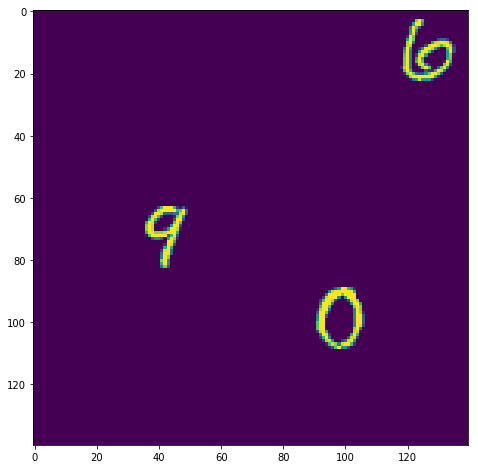

In [34]:
digit_1 = images[index]
digit_2 = images[(index + 1) % batch_size]
digit_3 = images[(index + 2) % batch_size]

no_digit = torch.zeros_like(digit_1)

# torch.cat combines tensors, dim is concatenate dimensions
row_1 = torch.cat((no_digit, no_digit, no_digit, no_digit, digit_1 ), dim = 2)
row_2 = torch.cat((no_digit, no_digit, no_digit, no_digit, no_digit), dim = 2)
row_3 = torch.cat((no_digit, digit_2,  no_digit, no_digit, no_digit), dim = 2)
row_4 = torch.cat((no_digit, no_digit, no_digit, digit_3,  no_digit), dim = 2)
row_5 = torch.cat((no_digit, no_digit, no_digit, no_digit, no_digit), dim = 2)

bigger_image = torch.cat((row_1, row_2, row_3, row_4, row_5), dim = 1)

# to use plt imshow, make it numpy array
bigger_image_numpy = bigger_image.numpy().squeeze()

plt.figure(figsize = (8, 8))
plt.imshow(bigger_image_numpy)
plt.show()

In [35]:
# # Now test_image is bigger and contains several digits

# # get predicted labels and score
# prediction = F.softmax(model(test_image.unsqueeze(dim=0)))
# values, indices = prediction.squeeze().max(0)
# # get the shape
# values.shape, indices.shape

In [36]:
# unsqueeze returns a new tensor with a dimension of size one
predictions = F.softmax(model(bigger_image.unsqueeze(dim = 0)))

# squeeze returns a tensor with all the dimensions of size 1 removed
values, indices = predictions.squeeze().max(0)

# values = probability?, indices = predicted digits?
print(values.shape, indices.shape)
print(values[0])
print(indices[0])

C:\Users\yukic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


torch.Size([57, 57]) torch.Size([57, 57])
tensor([0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689,
        0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689,
        0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689,
        0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689,
        0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689, 0.1689,
        0.1689, 0.3827, 0.8893, 0.8318, 0.6050, 0.8405, 0.7115, 0.7262, 0.9640,
        0.4360, 0.9998, 0.9958], grad_fn=<SelectBackward>)
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2,
        2, 2, 2, 2, 2, 1, 6, 6, 6])


In [37]:
# tensor to numpy
# .detach() avoids making a copy
values = values.detach().numpy()
indices = indices.detach().numpy()
print(values[0])
print(indices[0])

[0.16887742 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742
 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742
 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742
 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742
 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742
 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742
 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742 0.16887742
 0.16887742 0.16887742 0.16887742 0.16887742 0.38272858 0.88931286
 0.83183265 0.6050383  0.8405263  0.71151483 0.72624403 0.9640088
 0.43599167 0.9997682  0.99580246]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 1 6 6 6]


In [38]:
values.shape

(57, 57)

In [39]:
# let's define our confidence level
CONFIDENCE_LEVEL = 0.999999

Even if some part does not contain digits, the model outputs some level of probability so outputs some digits. But we set cutoff and suppose there is not digit, if the probability is low.

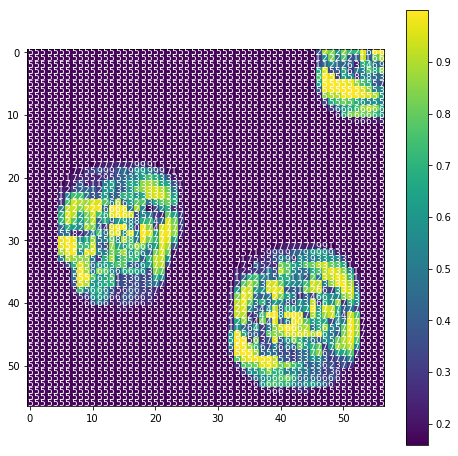

In [40]:
plt.figure(figsize = (8, 8))

# show probability of each pixel
plt.imshow(values)

# show color level of probability
plt.colorbar()

# put predicted digits in each pixel in grid way
height, width = indices.shape

for y in range(height):
    for x in range(width):
        digit = indices[y, x]
        
        # show predicted digits by plt.annotate
        plt.annotate(str(digit), 
                     xy = (x, y),
                     horizontalalignment = 'center',
                     verticalalignment = 'center',
                     size = 9,
                     # if probability is high, the color is light, so to see digit, text be black
                     color = 'white' if values[y][x] < CONFIDENCE_LEVEL else 'black')
        
plt.show()

In [29]:
# plt.imshow(values)
# plt.colorbar()
# height, width = indices.shape
# for y in range(height):
#         for x in range(width):
#             val = indices[y, x]
#             plt.annotate(str(val), xy=(x,y),
#                     horizontalalignment='center',
#                     verticalalignment='center', size=8,
#                     color='white' if values[y][x]<CONFIDENCE_LEVEL else 'black')

In [28]:
# def extract_boxes(image, step, sub_size_x=28, sub_size_y=28):
#     height, width = image.shape[0], image.shape[1]
#     nb_slides_x = (width-sub_size_x)//step + 1
#     nb_slides_y = (height-sub_size_y)//step + 1
#     location_boxes = []
#     for y in range(nb_slides_y):
#         for x in range(nb_slides_x):
#             location_boxes.append([y*step, x*step, sub_size_y, sub_size_x])
#     return np.array(location_boxes)

In [40]:
# print(bigger_image_numpy.shape[1] - 28)
# print((bigger_image_numpy.shape[1] - 28) // 4)
# print(112 / 4)
# print(113 / 4)
# print(113 // 4)
# s = 4
# print((bigger_image_numpy.shape[1] - 28) // s)
# s = 5
# print((bigger_image_numpy.shape[1] - 28) // s)
# s = 6
# print((bigger_image_numpy.shape[1] - 28) // s)

In [76]:
def box(image, step, sub_size_x = 28, sub_size_y = 28):
    height = image.shape[0]
    width = image.shape[1]
    
    # // (floor division) removes digits after decimanl and return integer
    # nb_slides_x and y for what ?
    nb_slides_x = (width - sub_size_x) // step + 1
    nb_slides_y = (height - sub_size_y) // step + 1
    
    # location_boxes info for what?
    location_boxes = []
    
    for y in range(nb_slides_y):
        for x in range(nb_slides_x):
            location_boxes.append([y * step, x * step, sub_size_y, sub_size_x])
            
    return np.array(location_boxes)

In [77]:
def box2(image, box_size):
    
    shape_big = image.shape[0]
    shape_small = values.shape[0]
    slide = shape_big // shape_small + 1
    
    # initialize
    location_boxes = []
    
    for i in range(shape_small):
        for j in range(shape_small):
            location_boxes.append([i * slide, j * slide, box_size, box_size])
    
    return np.array(location_boxes)

In [78]:
print("bigger image shape", bigger_image_numpy.shape)
print("prediction shape", values.shape)
print(140/29)

bigger image shape (140, 140)
prediction shape (57, 57)
4.827586206896552


In [79]:
print(box2(bigger_image_numpy, box_size = 20))
print(box2(bigger_image_numpy, box_size = 20).shape)
print(box2(bigger_image_numpy, box_size = 28))
print(box2(bigger_image_numpy, box_size = 28).shape)
print(box2(bigger_image_numpy, box_size = 24))
print(box2(bigger_image_numpy, box_size = 24).shape)

[[  0   0  20  20]
 [  0   3  20  20]
 [  0   6  20  20]
 ...
 [168 162  20  20]
 [168 165  20  20]
 [168 168  20  20]]
(3249, 4)
[[  0   0  28  28]
 [  0   3  28  28]
 [  0   6  28  28]
 ...
 [168 162  28  28]
 [168 165  28  28]
 [168 168  28  28]]
(3249, 4)
[[  0   0  24  24]
 [  0   3  24  24]
 [  0   6  24  24]
 ...
 [168 162  24  24]
 [168 165  24  24]
 [168 168  24  24]]
(3249, 4)


the summation of start coordinate and end coordinate can't exceed bigger image shape 140.

In [80]:
print(bigger_image_numpy.shape)
print((bigger_image_numpy.shape[0] - 28) // 4 + 1) 

(140, 140)
29


In [81]:
print((bigger_image_numpy.shape[0] - 26) // 4 + 1) 

29


In [29]:
# location_boxes = extract_boxes(test_image_numpy, step=4)

In [82]:
location_boxes = box(bigger_image_numpy, step = 4)
# location_boxes = box(bigger_image_numpy, step = 4, sub_size_x = 26, sub_size_y = 26)
# location_boxes = box(bigger_image_numpy, step =4, sub_size_x = 20, sub_size_y = 20)
# location_boxes = box2(bigger_image_numpy, box_size = 14)

print(location_boxes.shape)
print(location_boxes)

(841, 4)
[[  0   0  28  28]
 [  0   4  28  28]
 [  0   8  28  28]
 ...
 [112 104  28  28]
 [112 108  28  28]
 [112 112  28  28]]


location_boxes = box(bigger_image_numpy, step = 4, sub_size_x = 26, sub_size_y = 26) <br>
(841, 4)
[[  0   0  26  26]
 [  0   4  26  26]
 [  0   8  26  26]
 ...
 [112 104  26  26]
 [112 108  26  26]
 [112 112  26  26]]
location_boxes = box(bigger_image_numpy, step = 4, sub_size_x = 20, sub_size_y = 20) <br>
(961, 4)
[[  0   0  20  20]
 [  0   4  20  20]
 [  0   8  20  20]
 ...
 [120 112  20  20]
 [120 116  20  20]
 [120 120  20  20]]

<font color = red> length of values and length of location_boxes need to be matched </font>

In [83]:
29 * 29

841

The number of rows of location box darray is 29 * 29 = 841

In [110]:
# # keep cells which activates more than the confidence level
# indexes_to_keep = np.where(values.flatten() > CONFIDENCE_LEVEL)[0]
# # These are the confidences and bounding boxes we want to keep for the detection
# confident_scores = values.flatten()[indexes_to_keep]
# confident_boxes = location_boxes[indexes_to_keep]
# confident_labels = indices.flatten()[indexes_to_keep]

In [84]:
# print(type(np.where(values.flatten() > CONFIDENCE_LEVEL)))
# print(type(np.where(values.flatten() > CONFIDENCE_LEVEL)[0]))
# print(np.where(values.flatten() > CONFIDENCE_LEVEL))
print(np.where(values.flatten() > CONFIDENCE_LEVEL)[0])
print(values.shape)
print(values.shape[0] * values.shape[1])

[ 275  284  332 1618 1675 1773 2384 2427 2441 2502 2503 2559 2560 2616
 2655 2673 2712 2770]
(57, 57)
3249


In [85]:
# values is grid of probability
# numpy flatten() methods collapse it to 1 dimension
# by [0] at the end array numpy info becomes numpy array
indexes_to_keep = np.where(values.flatten() > CONFIDENCE_LEVEL)[0]

# extract information to make bounding boxes
confident_scores = values.flatten()[indexes_to_keep]
confident_boxes = location_boxes[indexes_to_keep]
confident_labels = indices.flatten()[indexes_to_keep]

IndexError: index 1618 is out of bounds for axis 0 with size 841

In [29]:
print(len(location_boxes))
print(len(values.flatten()))

841
841


In [106]:
# def draw_predictions(image, confident_boxes):
#     for y, x, box_size_y, box_size_x in confident_boxes:
#         image = cv2.rectangle(image,(x,y),(x+box_size_x,y+box_size_y),(255,0,0),1)
#     return image

cv2.rectangle arguments ( <br>
image, <br>
(starting x coordinate, starting y coordinate), <br>
(ending x coordinate, ending y coordinate), <br>
color (rectangle color or brightness), <br>
???) <br>
https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html

In [30]:
def draw_bounding_box(image, confident_boxes):
    # extract box info
    for y, x, box_size_y, box_size_x in confident_boxes:
        
        # making bounding box
        image = cv2.rectangle(image, (x, y), (x + box_size_x, y + box_size_y), (255, 0, 0), 1)
#         image = cv2.rectangle(image, (x, y), (x + box_size_x, y + box_size_y), (255, 0, 0))
    
    return image

In [77]:
# test_image_with_boxes = cv2.cvtColor(test_image_numpy.copy(), cv2.COLOR_GRAY2BGR)
# test_image_with_boxes = draw_predictions(test_image_with_boxes, confident_boxes)
# plt.imshow(test_image_with_boxes);

cvtColor performs color conversion. cv2.cvtColor argument (input_image, flag) where flag decides the conversion. <br>
COLOR_GRAY2BGR performs BGR to Gray conversion, which is specified in flag argument of cvtColor. <br>
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


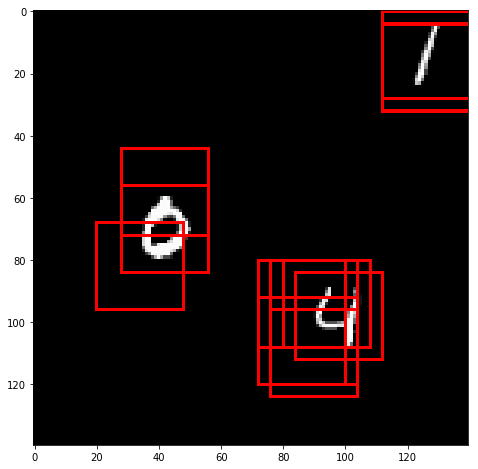

In [97]:
# make plot bigger
plt.figure(figsize = (8, 8))

# making bounding box
bigger_image_with_boxes = cv2.cvtColor(bigger_image_numpy.copy(), cv2.COLOR_GRAY2BGR)
bigger_image_with_boxes = draw_bounding_box(bigger_image_with_boxes, confident_boxes)

# show the image with bounding boxes
plt.imshow(bigger_image_with_boxes)
plt.show()

In [103]:
confident_boxes
# [y, x, y_length, x_length]

array([[  0, 112,  32,  28],
       [  4, 112,  28,  28],
       [ 44,  28,  28,  28],
       [ 56,  28,  28,  28],
       [ 68,  20,  28,  28],
       [ 80,  72,  28,  28],
       [ 80,  76,  28,  28],
       [ 80,  80,  28,  28],
       [ 84,  84,  28,  28],
       [ 92,  72,  28,  28],
       [ 92,  76,  28,  28],
       [ 96,  76,  28,  28]])

In [80]:
# def expansion(bounding_boxes, slide_x = 1, slide_y=1):
#     nb_boxes = len(bounding_boxes)   
#     idx = 0
#     while idx < nb_boxes-1:
#         y1, x1, box_size_y1, box_size_x1 = bounding_boxes[idx]
#         y2, x2, box_size_y2, box_size_x2 = bounding_boxes[idx+1]      
#         if (((x1 + box_size_x1 + slide_x >= x2) or (x2 + box_size_x2 + slide_x >= x1))
#             and (y1 + box_size_y1 + slide_y >= y2)):
#             x = min(x1, x2)
#             y = min(y1, y2)
#             box_size_y = max(y2+box_size_y2, y1+box_size_y1) - min(y1,y2)
#             box_size_x = max(x2+box_size_x2, x1+box_size_x1) - min(x1,x2)
#             bounding_boxes[idx]= np.array([y, x, box_size_y, box_size_x])
#             bounding_boxes = np.delete(bounding_boxes, idx+1, axis = 0 )
#             nb_boxes = len(bounding_boxes)   
#         else:
#             idx+=1

#     return bounding_boxes

In [156]:
# bouding_boxes to be "confident_boxes"
def expansion(bounding_boxes, slide_x = 1, slide_y = 1):
    
    # the number of bounding boxes which has high probability
    nb_boxes = len(bounding_boxes)
    # initialize
    index = 0
    
    while index < (nb_boxes - 1):
        
        # get info of a box
        y1, x1, box_size_y1, box_size_x1 = bounding_boxes[index]
        # get info of a nearby box
        y2, x2, box_size_y2, box_size_x2 = bounding_boxes[index + 1]
        
        # the below is the conditions when we want to merge bounding boxes to make a bigger box
        if (((x2 + box_size_x2 >= x1 + box_size_x1) 
            or (y2 + box_size_y2 >= y1 + box_size_y1))
            and (x2 <= x1 + box_size_x1)
            and (y2 <= y1 + box_size_y1)
           ): 
            
            # update bounding box information
            x = min(x1, x2)
            y = min(y1, y2)
            box_size_x = max(x1 + box_size_x1, x2 + box_size_x2) - min(x1, x2) 
            box_size_y = max(y1 + box_size_y1, y2 + box_size_y2) - min(y1, y2)
            
            # store bounding box information
            bounding_boxes[index] = np.array([y, x, box_size_y, box_size_x])
            bounding_boxes = np.delete(bounding_boxes, index + 1, axis = 0)
            
            # we deleted bouding boxes above, so update the number of bounding_boxes
            nb_boxes = len(bounding_boxes)
        else:
            index += 1
            
    return bounding_boxes

In [157]:
bounding_boxes = expansion(confident_boxes)

In [158]:
bounding_boxes

array([[  0, 112,  32,  28],
       [ 44,  20,  52,  36],
       [ 80,  72,  44,  40]])

In [155]:
# test_image_with_boxes = cv2.cvtColor(test_image_numpy.copy(), cv2.COLOR_GRAY2BGR)
# test_image_with_boxes = draw_predictions(test_image_with_boxes, bounding_boxes)
# plt.imshow(test_image_with_boxes);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


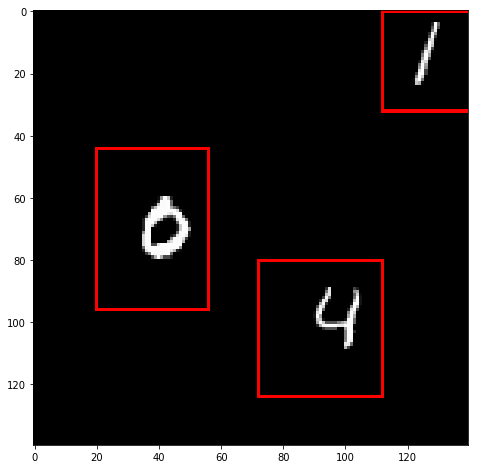

In [159]:
# make plot bigger
plt.figure(figsize = (8, 8))

# making bounding box
bigger_image_with_boxes = cv2.cvtColor(bigger_image_numpy.copy(), cv2.COLOR_GRAY2BGR)
bigger_imgae_with_boxes = draw_bounding_box(bigger_image_with_boxes, bounding_boxes)

# show the image with bounding boxes
plt.imshow(bigger_image_with_boxes)
plt.show()